# Kinesin attached to a bead


In this assay we had microtubules on the surface. We trapped beads with Kinesin (molecular motor) and had ATP inside the assay. As we lowered the kinesin-coated beads on top of a microtubule, it attached to it and started stepping on them. Kinesins were pulling the bead out of the center of the trap and thus increasing the force on the bead. At one point the kinesins couldn't keep up with this increased force and the bead construct snapped back to its original position.

After this, the cycles starts again with Kinesins pulling the bead out of the center of the trap.

To see and characterize this behaviour, we need to have the following plots:

- Plot force versus time

- Plot displacement of the bead from the center of the trap over time


In [49]:
import numpy as np
import matplotlib.pyplot as plt

from lumicks import pylake

In [50]:
"""  Install Pylake, in case it's not installed """
# !pip install lumicks.pylake

"  Install Pylake, in case it's not installed "

In [51]:
""" Open the file """

filename = r'20190215-170635 Marker Kinesin stepping open loop.h5';
data = pylake.File(filename)

In [52]:
""" Look at the contents of the file """

print(data)

File root metadata:
- Bluelake version: Unknown
- Description: 
- Experiment: 
- GUID: {568888F2-223B-40E8-B8FD-87582EF4D20A}
- Export time (ns): 1550246795359570747
- File format version: 2

Bead diameter:
  Template 1:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 93
  Template 2:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 93
Calibration:
  9:
    Force 1x
    Force 1y
    JSON:
    - Data type: object
    - Size: 1
Diagnostics:
  Nano X:
  - Data type: float64
  - Size: 184297
  Nano Y:
  - Data type: float64
  - Size: 184297
  Nano Z:
  - Data type: float64
  - Size: 184297
Force HF:
  Force 1x:
  - Data type: float64
  - Size: 184297
  Force 1y:
  - Data type: float64
  - Size: 184297
Force LF:
  Force 1x:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 93
  Force 1y:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 93
  Trap 1:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 93
Marker:

### Plot Force versus Time

In [53]:
""" Get the raw data out """

forcey = data['Force HF']['Force 1y']
forcex = data['Force HF']['Force 1x']

# We need to convert the time from nanoseconds to milliseconds and make sure that time=0 at 0 seconds
time = (forcey.timestamps - forcey.timestamps[0]) /1e9

forcex_data = forcex.data
forcey_data = forcey.data

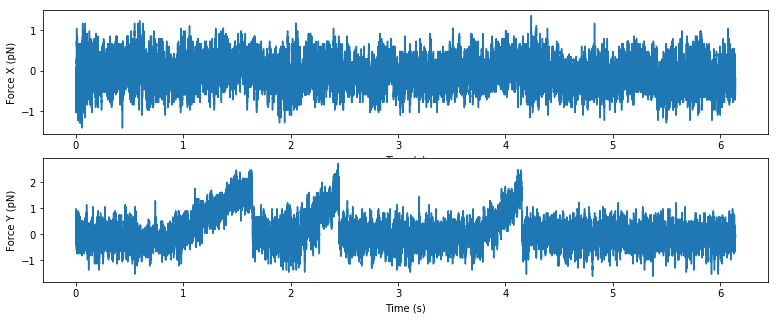

In [54]:
""" Plot force in x and y """

plt.figure(figsize=(13, 5))

plt.subplot(2,1,1)
plt.plot(time, forcex_data)
plt.xlabel('Time (s)')
plt.ylabel('Force X (pN)')

plt.subplot(2,1,2)
plt.plot(time, forcey_data)
plt.xlabel('Time (s)')
plt.ylabel('Force Y (pN)')

plt.savefig("../../docs/examples_by_segments/cytoskeletal_kinesin_bead_open_loop_fig1.png")

We can clearly see that the bead was moving in the y direction, so for now we're just going to work with that. Later I have an example of how to deal with a bead moving at an angle, like at 45 degrees.

But for now, let's also downsample the force data to 100 Hz and plot the two together.

In [55]:
""" Downsample the y force data """

downsampled_rate = 100 # Hz

sample_rate = forcey.sample_rate
print('Original sampling rate is ' + str(sample_rate) + ' Hz')
print('Downsampled rate is ' + str(downsampled_rate) + ' Hz')

forcey_downsamp = forcey.downsampled_by(int(sample_rate/downsampled_rate))
forcex_downsamp = forcex.downsampled_by(int(sample_rate/downsampled_rate))
time_downsampled = (forcey_downsamp.timestamps - forcey_downsamp.timestamps[0]) /1e9

forcey_downsamp_data = forcey_downsamp.data

Original sampling rate is 30000 Hz
Downsampled rate is 100 Hz


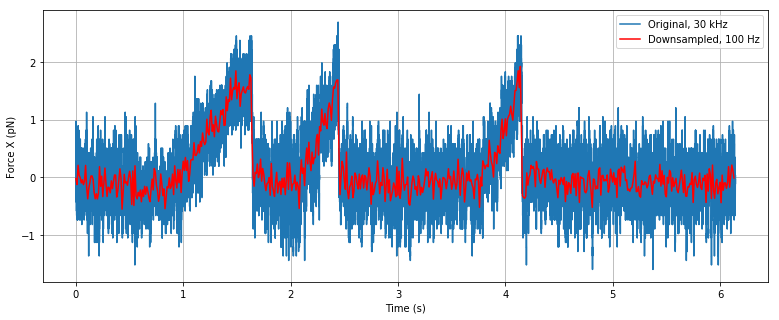

In [56]:
""" Plot the original force and the downsampled rate """

plt.figure(figsize=(13, 5))

plt.plot(time, forcey_data,label='Original, 30 kHz')
plt.plot(time_downsampled, forcey_downsamp_data, 'r',label='Downsampled, 100 Hz')

plt.xlabel('Time (s)')
plt.ylabel('Force X (pN)')
plt.legend()
plt.grid()

plt.savefig("../../docs/examples_by_segments/cytoskeletal_kinesin_bead_open_loop_fig2.png")

### Plot Displacement versus time

We need to convert the force to displacement, which we can do with the following formula:

$$\Delta x = \frac{F}{k}$$


where $F$ is the force and $k$ is the trap stiffness. Force we already have, we need to get stiffness.

In [57]:
""" Get stiffness from force calibration """

params = data['Calibration']['9']['Force 1y'].h5
ky = params.attrs.get("kappa (pN/nm)")
print(ky) # this is in pN/nm

params = data['Calibration']['9']['Force 1x'].h5
kx = params.attrs.get("kappa (pN/nm)")
print(kx) # this is in pN/nm

0.02648593456747345
0.019126295617530483


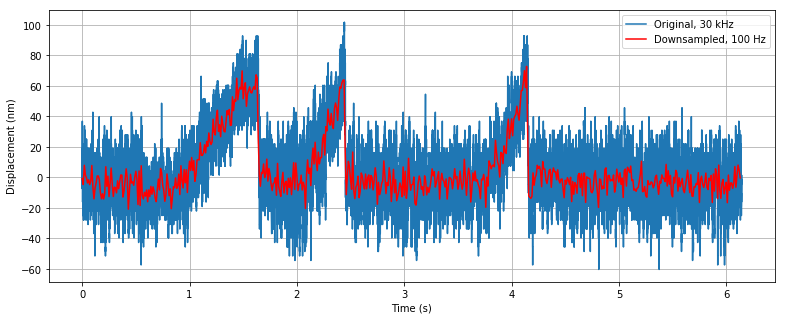

In [58]:
""" Calculate and plot displacement versus time """

displacement = forcey_data / ky
displacement_downsampled = forcey_downsamp_data / ky


plt.figure(figsize=(13, 5))

plt.plot(time, displacement,label='Original, 30 kHz')
plt.plot(time_downsampled, displacement_downsampled, 'r',label='Downsampled, 100 Hz')

plt.xlabel('Time (s)')
plt.ylabel('Displacement (nm)')
plt.legend()

plt.grid()

plt.savefig("../../docs/examples_by_segments/cytoskeletal_kinesin_bead_open_loop_fig3.png")

### Plot Distance and Force versus time on the same graph

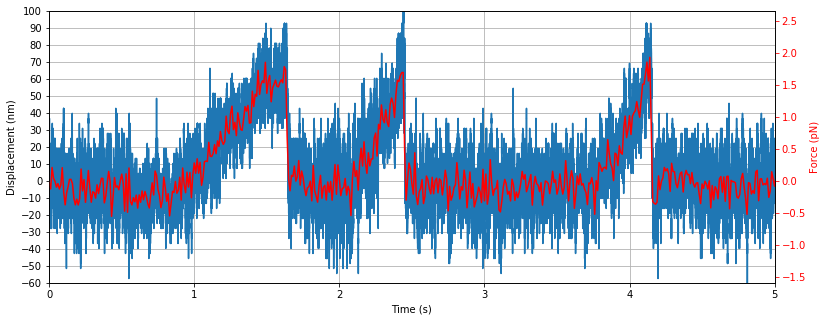

In [59]:
fig, ax1 = plt.subplots(figsize=(13, 5))

plt.plot(time, displacement,label='Original, 30 kHz')

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Displacement (nm)')
ax1.set_yticks([-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100])
ax1.grid()


# create another axis
ax2 = ax1.twinx()

# ax2.plot(time_downsampled, fy_downsamp.data+5*ky, 'r-')
ax2.plot(time_downsampled, forcey_downsamp_data, 'r',label='Downsampled, 100 Hz')

ax2.set_ylabel('Force (pN)', color='r')
ax2.tick_params('y', colors='r')


# Here we just make sure that both the displacement and the force axis have the same limits
ylimits = [-60, 100]
ylim2 =[]
for i in ylimits:
    ylim2.append(i*ky)

ax1.set_ylim(ylimits)
ax2.set_ylim(ylim2)
ax1.set_xlim([0, 5])


plt.savefig("../../docs/examples_by_segments/cytoskeletal_kinesin_bead_open_loop_fig4.png")

### Plot the position of the bead in 2d

To get an idea in which direction the microtubule was oriented, which direction the force was applied, we plot the (x,y) position of the bead

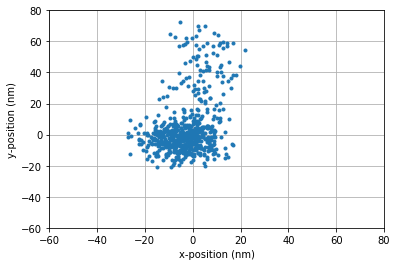

In [60]:
plt.plot(forcex_downsamp.data / kx , forcey_downsamp_data / ky,'.')
plt.xlim([-60, 80])
plt.ylim([-60, 80])

plt.ylabel('y-position (nm)')
plt.xlabel('x-position (nm)')
plt.grid()

plt.savefig("../../docs/examples_by_segments/cytoskeletal_kinesin_bead_open_loop_fig5.png")

Just by looking at the graph, we know that the microtubule was oriented at a ~85 degree angle, so looking at the forces in y only is a good approximation of what's happenning